## Wordcloud of top words in a text or corpus

The following script finds the most frequent words in a text or corpus. Many times wordcloud analyses are used to see word frequencies in relation to each other, but this particular script strips out stopwords so the resulting words shed light on thematic words.

###  Before we begin
Before we start, you will need to have set up a [Carbonate account](https://kb.iu.edu/d/aolp) in order to access [Research Desktop (ReD)](https://kb.iu.edu/d/apum). You will also need to have access to ReD through the [thinlinc client](https://kb.iu.edu/d/aput). If you have not done any of this, or have only done some of this, but not all, you should go to our [textPrep-Py.ipynb](https://github.com/cyberdh/Text-Analysis/blob/master/textPrep-Py.ipynb) before you proceed further. The textPrep-Py notebook provides information and resources on how to get a Carbonate account, how to set up ReD, and how to get started using the Jupyter Notebook on ReD.      

### Run CyberDH environment
The code in the cell below points to a Python environment specifically for use with the Python Jupyter Notebooks created by Cyberinfrastructure for Digital Humanities. It allows for the use of the different packages in our notebooks and their subsequent data sets.

##### Packages
- **sys:** Provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter. It is always available.
- **os:** Provides a portable way of using operating system dependent functionality.

#### NOTE: This cell is only for use with Research Desktop. You will get an error if you try to run this cell on your personal device!!

In [1]:
import sys
import os
sys.path.insert(0,"/N/u/cyberdh/Carbonate/dhPyEnviron/lib/python3.6/site-packages")
os.environ["NLTK_DATA"] = "/N/u/cyberdh/Carbonate/dhPyEnviron/nltk_data"

### Include necessary packages for notebook 

Python's extensibility comes in large part from packages. Packages are groups of functions, data, and algorithms that allow users to easily carry out processes without recreating the wheel. Some packages are included in the basic installation of Python, others created by Python users are available for download. Make sure to have the following packages installed before beginning so that they can be accessed while running the scripts.

In your terminal, packages can be installed by typing `pip install nameofpackage --user`. However, since you are using ReD and our Python environment, you will not need to install any of the packages below to use this notebook. Anytime you need to make use of a package, however, you need to import it so that Python knows to look in these packages for any functions or commands you use. Below is a brief description of the packages we are using in this notebook:   


- **nltk:** Platform for building Python programs to work with human language data.

- **string:** contains a number of useful constants and classes, as well as some deprecated legacy functions that are also available as methods on strings.

- **collections:** Implements specialized container datatypes providing alternatives to Python's general purpose built-in containers: dict, list, set, and tuple.

- **wordcloud:** A simple wordcloud generator in Python.

- **matplotlib:** A Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

- **re:** Provides regular expression matching operations similar to those found in Perl.

- **pandas:** An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **gensim:** Python library for topic modelling, document indexing and similarity retrieval with large corpora.

- **spacy:** A library for advanced Natural Language Processing in Python and Cython.

Notice we import some of the packages differently. In some cases we just import the entire package when we say `import XYZ`. For some packages which are small, or, from which we are going to use a lot of the functionality it provides, this is fine. 

Sometimes when we import the package directly we say `import XYZ as X`. All this does is allow us to type `X` instead of `XYZ` when we use certain functions from the package. So we can now say `X.function()` instead of `XYZ.function()`. This saves time typing and eliminates errors from having to type out longer package names. I could just as easily type `import XYZ as potato` and whenever I use a function from the `XYZ` package I would need to type `potato.function()`. What we import the package as is up to you, but some commonly used packages have abbreviations that are standard amongst Python users such as `import pandas as pd` or `import matplotlib.pyplot as plt`. You do not need to us `pd` or `plt`, however, these are widely used and using something else could confuse other users and is generally considered bad practice. 

Other times we import only specific elements or functions from a package. This is common with packages that are very large and provide a lot of functionality, but from which we are only using a couple functions or a specific subset of the package that contains the functionality we need. This is seen when we say `from XYZ import ABC`. This is saying I only want the `ABC` function from the `XYZ` package. Sometimes we need to point to the specific location where a function is located within the package. We do this by adding periods in between the directory names, so it would look like `from XYZ.123.A1B2 import LMN`. This says we want the `LMN` function which is located in the `XYZ` package and then the `123` and `A1B2` directory in that package. 

You can also import more than one function from a package by separating the functions with commas like this `from XYZ import ABC, LMN, QRS`. This imports the `ABC`, `LMN` and `QRS` functions from the `XYZ` package.

In [2]:
from nltk.corpus import stopwords
import string
from collections import defaultdict
import wordcloud
import matplotlib.pyplot as plt
import re
import pandas as pd
import gensim
from gensim.models.phrases import Phrases, Phraser
from gensim.utils import simple_preprocess
import spacy

#### File paths
Here we are saving as variables different file paths that we need in our code. We are doing this so you will not need to make changes in the code further down.

First we use the `os` package above to find our `['HOME']` directory using the `environ` function. This will work for any operating system, so if you decide to try this out on your personal computer instead of ReD, the `homePath` variable will still be the path to your 'home' directory, so no changes are needed.

Next, we combine the `homePath` file path with the folder names that lead to where our data is stored. Note that we do not use any file names yet, just the path to the folder. This is because we may want to read in all the files in the directory, or just one. There are options below for doing both. We save the path as a variable named `dataHome`.

Now we add the `homePath` file path to other folder names that lead to a folder where we will want to save any output generated by this code. We again will change the file names for the output in the appropriate cells down below. We save this file path as the variable `dataResults`.

Next, we use the file path from `dataHome` to point to the directory where our sample data as individual files is stored and assign that to the `corpusRoot` variable. 

Lastly, we use the file path from `dataHome` to point to the directory where our sample data as individual files within multiple directories is stored and assign that to the `directRoot` variable.

If you are using these notebooks for your own research then your data is stored in a different location you will need to change these file paths to point to where your data resides. Additionally, if you wish for the output generated by this notebook to be saved to a different location, you will need to assign the appropriate file path to the `dataResults` variable.

In [3]:
homePath = os.environ['HOME']
dataHome = os.path.join(homePath, "Text-Analysis-master", "data")
dataResults = os.path.join(homePath, "Text-Analysis-master", "Output")
corpusRoot = os.path.join(dataHome, "shakespeareFolger")
directRoot = os.path.join(dataHome, "starTrek")

### Set needed variables
This is where you will make some decisions about your data and set the necessary variables. We again do this so you will not need to make as many changes to the code later.

**corpusLevel**<br>
Your data needs to be in a '.txt' file format to work with this notebook. If it is then you need to specify if you want to read in a single document multiple documents in a directory, or multiple documents in multiple directories. If you want to read in a single document, then set `corpusLevel` equal to `"lines"` (keep the quotes). If you want to read in a directory of documents then set `corpusLevel` equal to `"files"` (again, keep quotes). If you have multiple directories with multiple '.txt' files, then assign `"direct"` (keep quotes) to the `corpusLevel` variable.

**nltkStop**<br>
The `nltkStop` is where you determine if you want to use the built in stopword list provided by the NLTK package. They provide stopword lists in multiple languages. If you wish to use this then set `nltkStop` equal to `True`. If you do not, then set `nltkStop` equal to `False`.

**customStop**<br>
The `customStop` variable is for if you have a dataset that contains additional stopwords that you would like to read in and have added to the existing `stopWords` list. You do **NOT** need to use the NLTK stopwords list in order to add your own custom list of stopwords. **NOTE: Your custom stopwords file needs to have one word per line as it reads in a line at a time and the full contents of the line is read in and added to the existing stopwords list.** If you have a list of your own then set `customStop` equal to `True`. If you do not have your own custom stopwords list then set `customStop` equal to `False`.

**stopLang**<br>
The `stopLang` variable is to choose the language of the nltk stopword list you wish to use. It is currently set to `'english'`. If you need a different language, simply change `'english'` to the anglicized name of the language you wish to use (e.g. 'spanish' instead of 'espanol' or 'german' instead of 'deutsch').

**spacyLem**<br>
`spacyLem` is where we decide if we want to use the spaCy package lemmatization function. What is lemmatization? Lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single item, and identified by the word's lemma, or dictionary form. In computational linguistics, lemmatisation is the algorithmic process of determining the lemma of a word based on its intended meaning. Unlike stemming, lemmatisation depends on correctly identifying the intended part of speech and meaning of a word in a sentence, where as stemming does not take the context of the word into account. For example, if we lemmatize the word "running" or "ran" it will become the word "run". If we stem the word "running" most stemmers will convert it to "runn" only removing the "ing" and leaving the second "n". Stemming will also change "police" and "policy" both to "polic" and they will be considered the same word and will be counted together by the wordcloud algorithm. The lemmatizer will leave both words as "police" and "policy". This is useful for word frequency algorithms as it allows the algorithm to just count "walk" instead of "walking", "walked", and "walk" and thereby can give further insight into the corpus that may not have been evident otherwise. To use the spacy lemmatizer set `spacyLem` equal to `True`. If you do not wish to use the lemmatizer set `spacyLem` equal to `False`.

**lemLang**<br>
Now we choose the language for our lemmatizer. The languages available for spacy include the list below and the abbreviation spacy uses for that language:

- **English:** `"en"`
- **Spanish:** `"es"`
- **German:** `"de"`
- **French:** `"fr"`
- **Italian:** `"it"`
- **Portuguese:** `"pt"`
- **Dutch:** `"nl"`
- **Multi-Language:** `"xx"`

To choose a language simply type the two letter code following the angliscized language name in the list above and assign it to the variable `lemLang`. So for Spanish it would be `"es"` (with the quotes) and for German `"de"` and so on. 

**encoding/errors**<br>
The variable `encoding` is where you determine what type encoding to use (ascii, ISO-8850-1, utf-8, et cetera). We have it set to `"UTF-8"` at the moment as we have found it is less likely to have any problems. However, errors do occur, but the encoding errors rarely impact our results and it causes the Python code to exit. So instead of dealing with unhelpful errors we ignore the ones dealing with encoding by assigning `"ignore"` to the `errors` variable. If you want to see any encoding errors then change `'ignore'` to `None` without the quotes.

**stopWords**<br>
The `stopWords = []` is an empty list that will contain the final list of stop words to be removed form your dataset. What ends up in the list depends on whether you set `nltkStop` and/or `customStop` equal to `True` or `False` and if you add any additional words to the list.

In [4]:
corpusLevel = "lines"
nltkStop = True
customStop = True
stopLang = 'english'
spacyLem = True
lemLang = "en"
encoding = "UTF-8"
errors = "ignore"
stopWords = []

### Stopwords
If you set `nltkStop` equal to `True` above then this will add the nltk stopwords list to the empty list named `stopWords`. You should already have chosen your language above, so there is no need to do that here.

If you wish to add additional words to the `stopWords` list, add the word in quotes to the list in `stopWords.extend(['the', 'words', 'you', 'want', 'to', 'add'])`.

In [5]:
# NLTK Stop words
if nltkStop is True:
    stopWords.extend(stopwords.words(stopLang))

    stopWords.extend(['would', 'said', 'says', 'say', 'also', 'ay', 'hast'])

#### Add own stopword list

Here is where your own stopwords list is added if you selected `True` in `customStop` above. Here you will need to change the folder names and file name to match your folders and file. Remember to put each folder name in quotes and in the correct path order, always putting the file name including the file extension ('.txt') last.

In [6]:
if customStop is True:
    stopWordsFilepath = os.path.join(dataHome, "earlyModernStopword.txt")

    with open(stopWordsFilepath, "r",encoding = encoding) as stopfile:
        stopWordsCustom = [x.strip() for x in stopfile.readlines()]

    stopWords.extend(stopWordsCustom)

### Functions
We need to create a few functions in order to calculate and create a wordcloud. Any time you see `def` that means we are *DE*claring a *F*unction. The `def` is usually followed by the name of the function being created and then in parentheses are the parameters the function requires. After the parentheses is a colon, which closes the declaration, then a bunch of code below which is indented. The indented code is the program statement or statements to be executed. Once you have created your function all you need to do in order to run it is call the function by name and make sure you have included all the required parameters in the parentheses. This allows you to do what the function does without having to write out all the code in the function every time you wish to perform that task.

#### Text Cleaning
The first function does some text cleaning for us and requires the parameter: sentences (as in the sentences that make up your corpus) 

We are using the gensim package's `simple_preprocess` function which lowercases and removes punctuation from our text. We use a for loop to iteratively apply the function to the whole corpus.

In [7]:
def sentToWords(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

#### Get Ngrams

This code will most likely not need to be adjusted. It creates a model of bigrams and trigrams in your dataset that occur frequently and then connects them with an underscore so the word counting algorithm will later consider them as one word. This is a good idea for items like 'new york' or 'new zealand' or 'Ho Chi Minh'. If we do not combine these frequently occuring phrases then 'new' and 'york' will be considered independently and give us less accurate results.

However, you may wish to adjust two settings depending on your data. The first is `min_count` and we assign a number to a variable `minCount` that will be used for `min_count` in the code. The other setting you might want to adjust is `threshold` and for this we assign a number to a variable `tHold` that will be used for `threshold` in the code.

Right now we have a `min_count` of 5 and a `threshold` of 100. The `min_count` is simply the minimum number of times the bigram or trigram needs to occur in order to be combined with an underscore. The `threshold` is a score that the bigram or trigram needs to exceed in order to be combined with an underscore. The score is determined by using this formula: (bigram_count - min_count)\*vocab_count/(wordA_count \* wordB_count). So let's say we have the bigram "good_lord" and it appears 30 times in a text of 10,000 words where "good" appears 60 times total and "lord" appears 40. With our `min_count` set to 5 we get the following: (30 - 5)\*10000/(60 \* 40) = 104.167 which means since our `threshold` is set to 100 "good_lord" will be combined with an underscore and made into a bigram. If the resulting score is above your `threshold` then the ngram is considered important enough to combine with an underscore and will be viewed as one word for the word counting later. Therefore, if you increase the `threshold`, you will get fewer bigrams and trigrams. If our threshold was set to 110, then "good" and "lord" would not be combined into "good_lord".

The Phraser function takes the model you built with the Phrases function and cuts down memory consumption of Phrases, by discarding model state not strictly needed for the bigram detection task.

In [8]:
# Variables
minCount = 5
tHold = 100

def get2gramPhrases(tokens):
    # Build the bigram and trigram models
    bigram = Phrases(tokens, min_count=minCount, threshold=tHold) # higher threshold fewer phrases.  

    # Removes model state from Phrases thereby reducing memory use.
    bigramMod = Phraser(bigram)
    
    return bigramMod

def get3gramPhrases(tokens):
    bigram = Phrases(tokens, min_count=minCount, threshold=tHold) # higher threshold fewer phrases.
    trigram = Phrases(bigram[tokens], threshold=tHold)
    
    trigramMod = Phraser(trigram)
    return trigramMod

Below are functions we are creating that perform certain tasks. First we are creating a function to remove the stopwords that are in our stopword list we created previously. Then we create functions to apply our bigram and trigram code from above. 

In [9]:
# Define functions for stopwords, bigrams, and trigrams
def removeStopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stopWords] for doc in texts]

def makeBigrams(tokens):
    bigrams = get2gramPhrases(tokens)
    return [bigrams[doc] for doc in tokens]

def makeTrigrams(tokens):
    bigrams = get2gramPhrases(tokens)
    trigrams = get3gramPhrases(tokens)
    return [trigrams[bigrams[doc]] for doc in tokens]

Next we create a function that will lemmatize words if you set `spacyLem` equal to `True` above. If you set it equal to `False` then the function will simply find commonly occuring ngrams and add them to the token list.

In [10]:
# Form ngrams
def makeLemma(tokens):
    dataWordsNgrams = makeTrigrams(tokens)

    if spacyLem is True:
        def lemmatization(tokens):
            """https://spacy.io/api/annotation"""
            textsOut = []
            for sent in tokens:
                doc = nlp(" ".join(sent)) 
                textsOut.append([token.lemma_ for token in doc if token.lemma_ != '-PRON-'])
            return textsOut
        
        # Initialize spacy language model, eliminating the parser and ner components
        nlp = spacy.load(lemLang, disable=['parser', 'ner'])
    
        # Do lemmatization
       
        dataLemmatized = lemmatization(dataWordsNgrams)
       
        return dataLemmatized
    
    else:
        
        return dataWordsNgrams


#### Plot wordcloud

Now we need a function that creates a wordcloud based on word frequency and plots it. To start we name the needed parameters which includes the words (`tokens`), the file path where we want to save the resulting visualization (`wcImgFilepath`), the dpi quality of the result (`dpi`), and the maximum amount of words we want the wordcloud to show (`maxWordCnt`).

The statements to execute begin by determining the word frequency. Next we need to describe the aesthetics of the wordcloud such as background color, maximum number of words, and color scheme of the wordcloud. We do this using functions and parameters from the wordcloud package and saving them as the variable `wc` (for wordcloud).

Next we need to generate the wordcloud and make sure it is generated using word frequency and displays the words, not the frequency (`wc.fit_words(freq)`). 

Then are the statements for how the wordcloud is displayed, so first we state the figures size (`plt.figure(figsize = (60,20))`). Then we say we want the wordcloud to look like what we described in our 'wc' variable above (`plt.imshow(wc, interpolation = 'bilinear')`), and that we are not using an x or y axis (`plt.axis("off")`). Next we want the layout to be tight instead of spread out (`plt.tight_layout()`). Then we state arguments for how we want the wordcloud saved to file (`plt.savefig(wcImgFilepath, format = 'png', dpi = dpi, bbox_inches = 'tight')`), and finally that we want to see the final result displayed in the notebook (`plt.show()`).

In [11]:
def plotWordCloud(tokens, wcImgFilepath, dpi, maxWordCnt):

    freq = defaultdict(int)

    for t in tokens:
        freq[t] += 1
    
    wc = wordcloud.WordCloud(width = width, height = height, background_color = bgc, max_words = maxWordCnt, colormap = cm, min_font_size=minFont)
    

    # generate word cloud
    wc.fit_words(freq)

    # show
    plt.figure(figsize = figSz)
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis("off")

    plt.tight_layout()
    
    # save graph as a png image to file
    plt.savefig(wcImgFilepath, format = fmt, dpi = dpi, bbox_inches = 'tight')
    
    plt.show()

#### Pull from a single file

This function reads a single file from which we will be counting and plotting the wordcloud. This function opens the file, reads it, then applies the cleaning function we created above to it. It ends by calling the wordcloud plotting function we created above.

In [12]:
def drawWordCloudLines(textFilepath, wcImgFilepath, dpi, 
                                maxWordCnt):
    docs = []
    with open(textFilepath, "r", encoding=encoding, errors = errors) as f:
        for line in f:
            stripLine = line.strip()
            if len(stripLine) == 0:
                continue
            docs.append(stripLine.split())

    words = list(sentToWords(docs))
    stop = removeStopwords(words)
    lemma = makeLemma(stop)
    tokens = [item for sublist in lemma for item in sublist]
    
    
    plotWordCloud(tokens, wcImgFilepath, dpi, maxWordCnt)

#### Pull from a directory

This function reads all files in a directory from which we will be counting and plotting a wordcloud. This function 'walks' through the directory and all sub-directories, ignores hidden files which are designated by the file name beginning with a period. The function then creates a variable that says to include the entire file path for each file in the directory. It then reads each file in the directory and applies the cleaning function we created above. Finally it calls the wordcloud plotting function we created above.

In [13]:
def drawWordCloudFiles(corpusRoot, wcImgFilepath, dpi, 
                          maxWordCnt):
   
    docs = []
    
    for root, subdirs, files in os.walk(corpusRoot):
        
        for filename in files:
            
            # skip hidden file
            if filename.startswith('.'):
                continue
            
            textFilepath = os.path.join(root, filename)
            
            with open(textFilepath, "r", encoding=encoding, errors = errors) as f:
                docs.append(f.read().strip('\n').splitlines())
                
        
        words = list(sentToWords(docs))
        stop = removeStopwords(words)
        lemma = makeLemma(stop)
        tokens = [item for sublist in lemma for item in sublist]
                
    
    plotWordCloud(tokens, wcImgFilepath, dpi, maxWordCnt)

#### Pull from multiple directories

This function will read in all '.txt' files that are in multiple directories. This is useful if you have your corpus organized using directories. For example, if you are looking at authors of a particular genre and have a directory for each author, with the directory containing the works of that specific author. You may want a wordcloud of all the authors together to compare to wordclouds of each author individually. This function allows for that option.

In [14]:
def drawWordCloudDirect(directRoot, wcImgFilepath, dpi, maxWordCnt):
    paths = []
    docs = []
   
    dataPath = os.path.join(directRoot)
    for folder in sorted(os.listdir(dataPath)):
        if not os.path.isdir(os.path.join(dataPath, folder)):
            continue
        for file in sorted(os.listdir(os.path.join(dataPath, folder))):
            paths.append(((dataPath, folder, file)))
    df = pd.DataFrame(paths, columns = ["Root", "Folder", "File"])
    df["Paths"] = df["Root"].astype(str) +"/" + df["Folder"].astype(str) + "/" + df["File"].astype(str)
    for path in df["Paths"]:
        if not path.endswith(".txt"):
            continue
        with open(path, "r", encoding = encoding, errors = errors) as f:
            docs.extend(f.read().strip().split())
    
    words = list(sentToWords(docs))
    stop = removeStopwords(words)
    lemma = makeLemma(stop)
    tokens = [item for sublist in lemma for item in sublist]
            
    
    plotWordCloud(tokens, wcImgFilepath, dpi, maxWordCnt)

### Plot Wordcloud

Here we have an 'if else' statement that differentiates between creating a wordcloud from a single document, multiple documents in a directory, or multiple documents in multiple directories depending on if you set `corpusLevel` above equal to `"lines"`, `"files"`, or `"direct"`.

#### First set variables
Before we run the cell below, make sure the variables in the beginning of the notebook are set correctly. The `document` variable should contain the name and file extension (.txt) of the single file you wish to use if you assigned `"lines"` to `corpusLevel` above. If you set `corpusLevel` above to `"files"` or `"direct"` then don't worry about the `document` variable.

Next we name the output '.png' file produced by the code below. Right now the name is a generic `"wordcloud.png"` but you may wish to change it to something that matches your data. Then we choose the output format by assigning the desired format to the `fmt` variable. It is currently set to `"png"`. Make sure the format is in quotes and matches the file format of the output file above.

Now we decide the width and height of the output image and assign those integers to the `width` and `height` variables. This mixed with the `figSz` variable (discussed below) help produce a sharper and crisper looking result, so feel free to play with these numbers. 

Then we decide the color scheme. First we choose the background color and assign it to the variable `bgc`. Make sure the color you choose is in quotes. Next we choose the color scheme of the words in the wordcloud and assign it to the `cm` variable. The color scheme also needs to be in quotes. The current color scheme is `"Dark2"`. Other color options can be found [here](https://www.nceas.ucsb.edu/~frazier/RSpatialGuides/colorPaletteCheatsheet.pdf). 

Now we set our dpi and maximum word count. The `dpi` variable gives the desired resolution of our output image and the `maxWordCnt` gives the maximum number of words we want to appear in our wordcloud.

Next we choose what the minimum font size will be for words in the wordcloud and assign the font size to the variable `minFont`.

Then we choose the size of the figure produced and assign it to the variable `figSz`. For this we need two numbers and they need to be in parentheses and separated by a comma. The first number is for the height and the second number is for the width. Feel free to adjust the numbers until you get your desired output.


#### From a single text

If you set `corpusLevel` above equal to `"lines"`, then the first part of the script in the cell below uses the functions and file paths we have created to get word frequencies and plot a wordcloud from a single '.txt' file. 

We start by pointing to the specific file. 

Next we save the output file based on what we set in the `#Variables` section at the beginning of the cell. 

Then we implement the single text plotting function we created above to give us a wordcloud of most frequent thematic words in our chosen text. 

#### Wordcloud from multiple files in a directory

If you set `corpusLevel` equal to `"files"`, then the second part of the script in the cell below after `elif corpusLevel == "files":` now uses the functions and file paths we have created above to get word frequencies and plot a wordcloud from multiple '.txt' files in a directory. 

We start by saying where we want the output file saved based on our setting in the `#Variables` section at the beginning of the cell.  

Then we implement the files scan plotting function we created above to give us a wordcloud of most frequent thematic words from our corpus.

#### Wordcloud from multiple files in multiple directories

If you set `corpusLevel` equal to `"direct"`, then the third part of the code in the cell below after `elif corpusLevel == "direct":` uses the functions and file paths we have created above to get word frequencies and plot a wordcloud from multiple '.txt' files in multiple directories.

We start by saying where we want the output file saved based on our setting in the `#Variables` section at the beginning of the cell.  

Then we implement the directory scan plotting function we created above to give us a wordcloud of most frequent thematic words from our corpus.

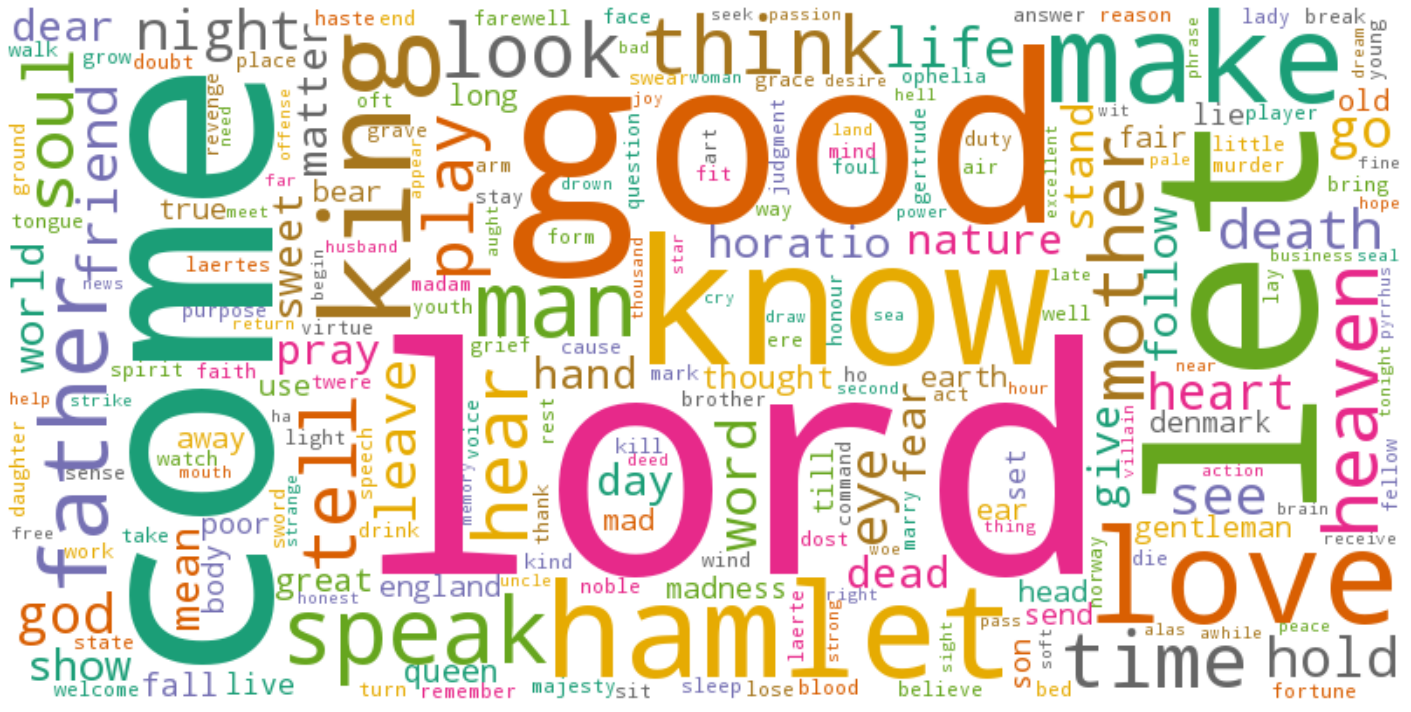

In [15]:
#Variables
document = "Hamlet.txt"
wcOutputFile = "wordcloud.png"
fmt = "png"
width = 800
height = 400
bgc = "white"
cm = "Dark2"
dpi = 300
maxWordCnt = 500
minFont = 10
figSz = (20, 10)


if corpusLevel == "lines":
    # Use case one, draw word cloud from a single text

    textFilepath = os.path.join(corpusRoot, document)

    # filepath to save word cloud image
    wcImgFilepath = os.path.join(dataResults, wcOutputFile)

    # Plot wordcloud from single text
    drawWordCloudLines(textFilepath, wcImgFilepath, dpi, maxWordCnt)
elif corpusLevel == "files":
    # Use case two, draw word cloud from a corpus root

    # filepath to save word cloud image
    wcImgFilepath = os.path.join(dataResults, wcOutputFile)

    # Plot wordcloud from corpus
    drawWordCloudFiles(corpusRoot, wcImgFilepath, dpi, maxWordCnt)
elif corpusLevel == "direct":
    # Use case three, draw word cloud from multiple directories

    # filepath to save word cloud image
    wcImgFilepath = os.path.join(dataResults, wcOutputFile)

    # Plot wordcloud from corpus
    drawWordCloudDirect(directRoot, wcImgFilepath, dpi, maxWordCnt)
else:
    print('The corpusLevel variable in the variables cell of code (4th cell) was not assigned "lines", "files", or "direct" and so no corpus has been read in nor a wordcloud created. Please read the instructions preceding the variables cell and decide which option best fits your corpus.')
    exit()

## VOILA!!